# Training Material: Change Detection using Normal Distribution and ALOS-2 Data

## Module 1: Introduction to Change Detection

### 1.1 What is Change Detection?

Change detection is the process of identifying differences in the state of an object or phenomenon by observing it at different times. It has various applications, including dam monitoring, disaster management, urban planning, and environmental monitoring.

Common change detection techniques include image differencing, image rationing, change vector analysis, and classification-based methods.

### 1.2 Yamba Dam Case Study

The Yamba Dam, located in Japan, serves as our case study. We will use ALOS-2 data to monitor changes in water extent over time.

## Module 2: Change Detection using Normal Distribution

### 2.1 Introduction to Normal Distribution

The normal distribution is a probability distribution characterized by its mean and standard deviation. It's often used to model natural phenomena.

### 2.2 Detecting Significant Changes in Difference Images

This section presents a procedure for detecting areas of water body change by considering 2.5% ($\mu \pm 2\sigma$) on each side of the pixel value distribution as a significant change.

##### Calculate threshold by mean and standard deviation

Calculate the pixel value mean (`mean_diff`) and standard deviation (`std_diff`) of the difference images.

In the following cells:
- lower_bound and upper_bound with μ±2σ.
- Pixels within `[lower_bound, upper_bound]` are considered “no change” and pixels outside this range [`< lower_bound` or `> upper_bound`] are considered “changed”.
- This method follows the assumption of a normal distribution and assumes that most pixels within ±2σ represent no change.

Note: In this material, `diff_image` (the output of calculate difference between 2 images) represents the pixel-by-pixel difference between pre-typhoon and post-typhoon images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

##### Load image

In [2]:
# --- Load the Difference Image ---
difference_image_path = '/home/jovyan/shared/Arissara/genAI/pre_post_diff_img.tif'
with rasterio.open(difference_image_path) as src:
    diff_image = src.read(1)  # Read the first band
    profile = src.profile  # Get profile for saving output

##### Compute the Mean and Standard Deviation

Calculate the mean (`mean_diff`) and standard deviation (`std_diff`) of the `diff_image` data.

In [4]:
# --- Compute Mean (μ) and Standard Deviation (σ) ---
mean_diff = np.mean(diff_image)
std_diff = np.std(diff_image)

##### Define μ ± 2σ Thresholds

In [5]:
# Define threshold with μ±2σ
lower_bound = mean_diff - 2 * std_diff
upper_bound = mean_diff + 2 * std_diff

- Set the lower and upper bounds for the μ ± 2σ method.
- Pixels within the range `[lower_bound, upper_bound]` are considered "no-change", while Pixels outside this range (`< lower_bound` or `> upper_bound`) are considered "changed"
- This method assumes that most pixels within the ± 2σ range represent no change, following a normal distribution assumption.

##### Apply μ ± 2σ Threshold to Classify Changed and No-Changed Areas

Create a binary map (`changed_area`) where each pixel is labeled as "changed" or "no-change”.

In [6]:
# Apply a threshold of μ±2σ
changed_area = ((diff_image < lower_bound) | (diff_image > upper_bound)).astype(np.uint8)  # 1 for changed, 0 for no-change

##### Visualization

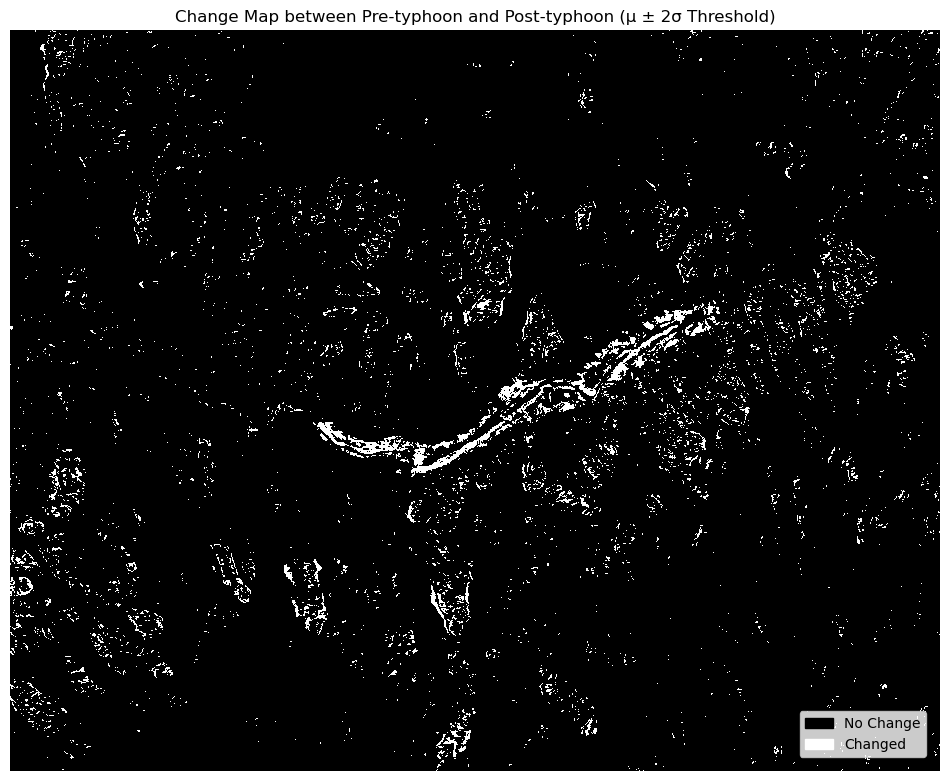

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap  # Import ListedColormap

# `changed_area` is binary change map data, where "changed" is 1 and "no change" is 0.

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the results using a gray color map.
ax.imshow(changed_area, cmap=ListedColormap(['black', 'white']))
ax.set_title("Change Map between Pre-typhoon and Post-typhoon (μ ± 2σ Threshold)")
ax.axis("off")

# Create a custom legend with “no change” and “change” colors.
no_change_patch = mpatches.Patch(color="black", label="No Change")  # Black is no change
changed_patch = mpatches.Patch(color="white", label="Changed")      # White is change
plt.legend(handles=[no_change_patch, changed_patch], loc="lower right", borderaxespad=1)

# Display plot
plt.show()